<p align="center"><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true"></p><h1><font color='0B5345'> <center>

Probabilidad y estadística

</center></font></h1>
<h2><font color='0B5345'> <center>
Caso aplicado: Regresión Lineal múltiple</center></font></h2>
<font  face="Courier New" size="3">

<p3><center><b><font color='0B5345' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia - Bioingeniería</font></b> </center></p3>

La regresión lineal múltiple se utiliza para estimar la relación entre  dos o más variables independientes y una variable dependiente. 

¿Cuando usar regresión lineal múltiple?

- Cuando se desea determinar qué tan fuerte es la relación entre dos o más variables independientes y una variable dependiente (por ejemplo, cómo la lluvia, la temperatura y la cantidad de fertilizante afectan el crecimiento de los cultivos).

- Cuando se desea saber el valor de la variable dependiente para un cierto valor de las variables independientes (por ejemplo, el rendimiento esperado de un cultivo con ciertos niveles de lluvia, temperatura y adición de fertilizantes).


### Supuestos

1. **Homogeneidad de la varianza** (homoscedasticidad)
2. **Independencia de las observaciones** :En la regresión lineal múltiple, es posible que algunas de las variables independientes estén realmente correlacionadas entre sí, por lo que es importante comprobarlas antes de desarrollar el modelo de regresión. Si dos variables independientes están demasiado correlacionadas (r2 > ~0,6), entonces sólo una de ellas debe usarse en el modelo de regresión.
3. **Normalidad** (Variable dependiente).
4. **Linealidad**
5. La variable dependiente y la independiente deben ser **continuas**

La fórmula para una regresión lineal múltiple es:

<p align="center">
  <img src="https://4.bp.blogspot.com/-GphUJwhYWeo/XMBnZyQgaSI/AAAAAAAAU8A/VIBpOBmskMkfS7nEyvkR4rcOry8tCSpPgCLcBGAs/s400/Captura%2Bde%2Bpantalla%2B2019-04-24%2Ba%2Blas%2B15.40.45.png" alt="Regresión lineal múltiple">
</p>


y= el valor previsto de la variable dependiente

B0 = la intersección con el eje y (valor de y cuando todos los demás parámetros están establecidos en 0)

Bi*Xi = el coeficiente de regresión (Bi) de la variable independiente (Xi) (también conocido como el efecto que tiene aumentar el valor de la variable independiente sobre el valor de y previsto)

BnXn= El coeficiente de regresión de la última variable independiente
e= error del modelo (también conocido como cuánta variación hay en nuestra estimación de y)

**Para encontrar la línea de mejor ajuste para cada variable independiente, la regresión lineal múltiple calcula tres cosas:**

1. Los coeficientes de regresión que conducen al error general más pequeño del modelo.
2. El estadístico t del modelo general.
3. El valor p asociado (qué probabilidad hay de que el estadístico t hubiera ocurrido por casualidad si la hipótesis nula de que no hay relación entre las variables independientes y dependientes fuera cierta).

### Ejemplo

Usted es un investigador de salud pública interesado en los factores sociales que influyen en las enfermedades cardíacas. 

Se encuestan 500 pueblos y se recopilan datos sobre el porcentaje de personas de cada pueblo que fuman, el porcentaje de personas de cada pueblo que van al trabajo en bicicleta y el porcentaje de personas de cada pueblo que padecen enfermedades cardíacas, ustede quiere estudiar la información recopilada para analizar la relación entre ellas.

### Hipótesis

H0: Ir en bicicleta al trabajo y fumar no influyen en las tasas de enfermedades cardíacas.

H1: Tanto ir en bicicleta al trabajo como fumar influyen en las tasas de enfermedades cardíacas.

#### Variables

1. Biking (%) 
2. Smoking (%)
3. heart.disease (%)

In [231]:
# Librerías para el tratamiento de los datos
import pandas as pd
import numpy as np

# Librerías para pruebas de hipótesis, entrenamiento y modelado
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.diagnostic import acorr_ljungbox

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

#### Carga de datos

In [232]:
datos = pd.read_csv('heart_data.csv',sep=',')
del datos['Unnamed: 0']

In [233]:
print(f'El números de registros y variables es {datos.shape}')

El números de registros y variables es (498, 3)


#### Limpieza de datos

Verificación de filas o columnas vacias

In [234]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   biking         498 non-null    float64
 1   smoking        498 non-null    float64
 2   heart.disease  498 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


##### Análisis descriptivo

Medidas de tendencia central y de posición:

In [235]:
datos.describe().T

,count,mean,std,min,25%,50%,75%,max
biking,498.0,37.788411,21.481519,1.119154,20.204598,35.824459,57.852786,74.907111
smoking,498.0,15.435034,8.289959,0.525850,8.279776,15.814614,22.568925,29.946743
heart.disease,498.0,10.174538,4.571874,0.551898,6.513683,10.385255,13.724024,20.453496


Medidas de forma

In [236]:
print('Coeficiente de asimetría:\n',datos.skew())
print('-------------------------------------------------')
print('Coeficiente de curtosis:\n',datos.kurt())

Coeficiente de asimetría:
 biking           0.072903
smoking         -0.035892
heart.disease   -0.033439
dtype: float64
-------------------------------------------------
Coeficiente de curtosis:
 biking          -1.210451
smoking         -1.106661
heart.disease   -0.914559
dtype: float64


Distribuciones de probabilidad

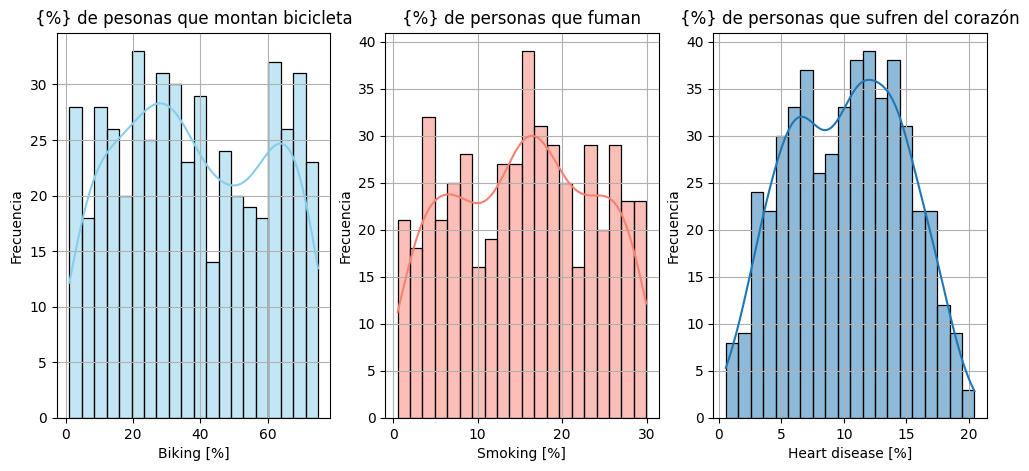

In [237]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

sns.histplot(data=datos, x='biking', bins=20, kde=True,ax=axs[0],color='skyblue')
axs[0].set_title('{%} de pesonas que montan bicicleta')
axs[0].set_xlabel('Biking [%]')
axs[0].set_ylabel('Frecuencia')
axs[0].grid(True)

sns.histplot(data=datos, x='smoking',bins=20, kde=True,ax=axs[1], color='salmon')
axs[1].set_title('{%} de personas que fuman')
axs[1].set_xlabel('Smoking [%]')
axs[1].set_ylabel('Frecuencia')
axs[1].grid(True)

sns.histplot(data=datos, x='heart.disease',bins=20, kde=True,ax=axs[2])
axs[2].set_title('{%} de personas que sufren del corazón')
axs[2].set_xlabel('Heart disease [%]')
axs[2].set_ylabel('Frecuencia')
axs[2].grid(True)
plt.show()


Detección de datos atípicos

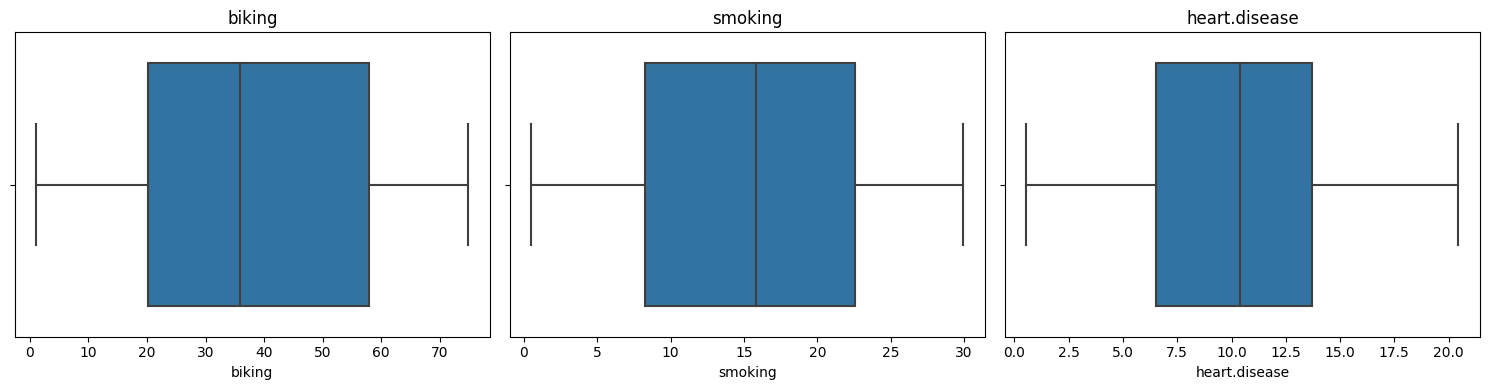

In [238]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
axs = axs.flatten()

for i, var in enumerate (datos):
    sns.boxplot(x=var,data=datos,ax=axs[i])
    axs[i].set_title(var)

plt.tight_layout()
plt.show()

### Análisis de regresión

1. Establecer cual es la variable explicada (Y) y cuales son las explicatorias (X)
2. Determinar la relación entre las variables

**1. Variables**:

**Explicada (Y)**: Heart disease

**Explicatorias (Xi)**: Biking, Smoking
____

**2. Relación entre las variables:**

**-** Determinar visualmente si existe una relación lineal entre las variables


Text(0, 0.5, 'Heart desease')

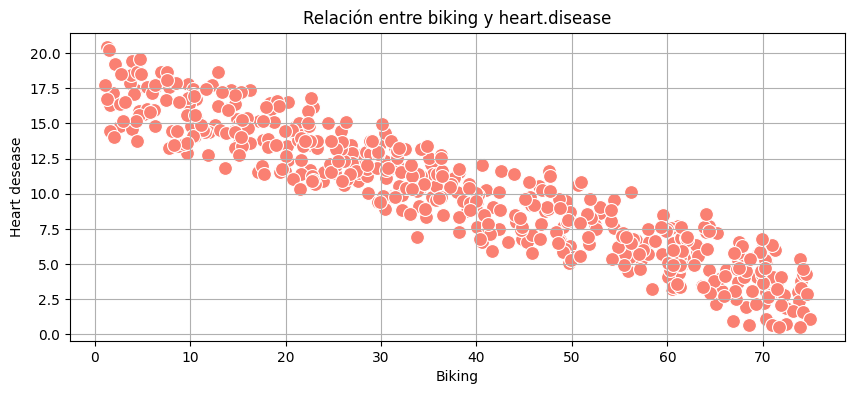

In [239]:
plt.figure(figsize = (10, 4))
plt.grid(True)
sns.scatterplot(x = 'biking', y = 'heart.disease', s = 100,data = datos, color='salmon')
plt.title('Relación entre biking y heart.disease')
plt.xlabel('Biking')
plt.ylabel('Heart desease')

Text(0, 0.5, 'Heart desease')

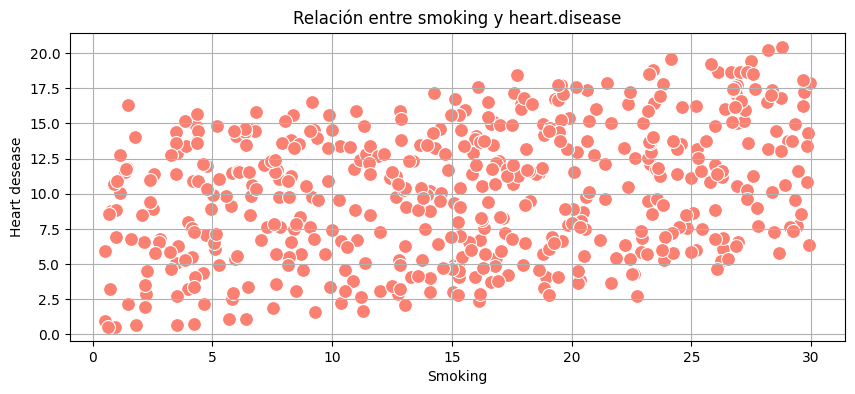

In [240]:
plt.figure(figsize = (10, 4))
plt.grid(True)
sns.scatterplot(x = 'smoking', y = 'heart.disease', s = 100,data = datos, color='salmon')
plt.title('Relación entre smoking y heart.disease')
plt.xlabel('Smoking')
plt.ylabel('Heart desease')

#### Matriz de correlación

Text(0.5, 1.0, 'Matriz de correlación')

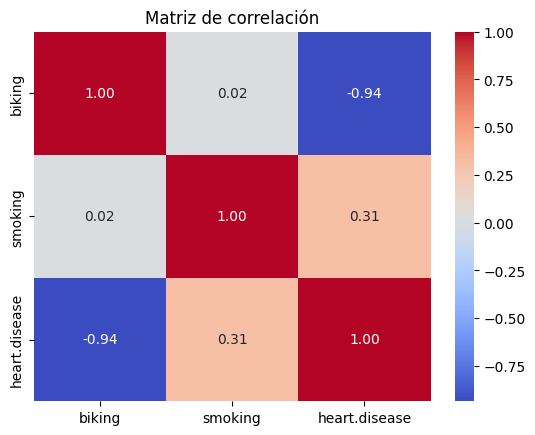

In [241]:
matriz_correlacion = datos.corr()
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')

### Generación del modelo

1. Definir datos de entrenamiento y prueba
2. Entrenamiento del modelo
3. Probar y evaluar el modelo
4. Graficar la recta de mejor ajuste del modelo
5. Validar supuestos del modelo para determinar si es funcional

**1. Datos de entrenamiento y prueba**

In [242]:
# Dataset con las variables explicativas
X = datos.drop(columns=['heart.disease'])

# Dataset con la variable explicada
y = datos['heart.disease']

# Dividimos nuestro dataset en datos de entrenamiento y datos de prueba 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Tamaño de los datos de entrenamiento y prueba para la variable explicativa
print('Tamaño de los datos de entrenamiento y prueba para la variable explicativa')
print(X_train.shape, X_test.shape )

# Tamaño de los datos de entrenamiento y prueba para la variable explicada
print('----------------------------------------------------------------------------')
print('Tamaño de los datos de entrenamiento y prueba para la variable explicada')
print(y_train.shape, y_test.shape)

Tamaño de los datos de entrenamiento y prueba para la variable explicativa
(348, 2) (150, 2)
----------------------------------------------------------------------------
Tamaño de los datos de entrenamiento y prueba para la variable explicada
(348,) (150,)


**2. Entrenamiento del modelo**

In [243]:
#Calculamos el intercepto con el eje y para los datos de entrenamiento
X_train_sm = sm.add_constant(X_train)

#Ajustamos el modelo
lr = sm.OLS(y_train, X_train_sm).fit()

#Calculamos el intercepto con el eje y de los datos de prueba
X_test_sm = sm.add_constant(X_test)

# Predecir los valores de y correspondientes a los valores de x_test_sm
y_pred_test = lr.predict(X_test_sm)
y_pred_train = lr.predict(X_train_sm)

**2.1 Recta de mejor ajuste y prueba del modelo** 

In [244]:
print(lr.params)
print(lr.summary())

const      15.011790
biking     -0.200067
smoking     0.176747
dtype: float64
                            OLS Regression Results                            
Dep. Variable:          heart.disease   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     8958.
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          4.60e-298
Time:                        23:09:44   Log-Likelihood:                -343.09
No. Observations:                 348   AIC:                             692.2
Df Residuals:                     345   BIC:                             703.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

Luego la ecuación de la recta que mejor se ajusta a nuestros datos es:
________________________________________________________________________

                Y = 0.1767 *Smoking - 0.2001 *Biking + 15.0118
________________________________________________________________________

**2.2 Interpretación**

La pendiente nos da información sobre la taza de cambio entre montar en bicicleta, fumar y las enfermedades cardiovasculares.

Las estimaciones de la tabla nos dicen que por cada aumento del 1% en el uso de la bicicleta para ir al trabajo hay una disminución asociada del 0,2% en las enfermedades cardíacas, y que por cada aumento del 1% en el tabaquismo hay un aumento asociado del 0,17% en las enfermedades cardíacas.

**3. Gráfico del plano de mejor ajuste**

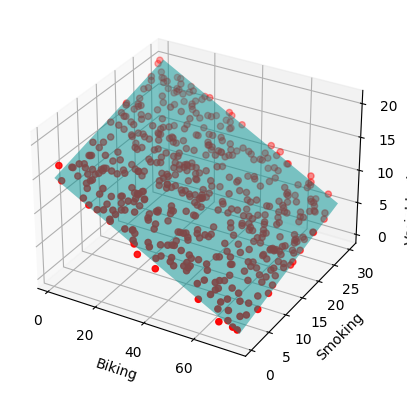

In [245]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(datos['biking'], datos['smoking'], y, c='r', marker='o')

# Genera una malla para el plano de regresión
x1_range = np.linspace(min(datos['biking']), max(datos['biking']), 100)
x2_range = np.linspace(min(datos['smoking']), max(datos['smoking']), 100)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
y_pred = 15.0118 - 0.2001 * x1_grid + 0.1767 * x2_grid

# Plano de regresión
ax.plot_surface(x1_grid, x2_grid, y_pred, alpha=0.5, rstride=100, cstride=100, color='c')

ax.set_xlabel('Biking')
ax.set_ylabel('Smoking')
ax.set_zlabel('Variable de Respuesta y')

plt.show()


**4. Validación de supuestos**

**Supuesto 1: Variable dependiente normal**

H_0 : El porcentaje de incidencia de enfermedades cardiacas sigue una distribución normal

H_1 : El porcentaje de incidencia de enfermedades cardiacas no sigue una distribución normal

In [246]:
from scipy import stats
ks_statistic, ks_p_value = stats.kstest(datos['heart.disease'], 'norm', args=(datos['heart.disease'].mean(), datos['heart.disease'].std()))

# Imprimir el resultado
print(f'Estadístico de prueba W: {ks_statistic:.4f}')
print(f'P-valor: {ks_p_value:.4f}')

# Interpretar el resultado
alfa = 0.05  # Nivel de significancia
if ks_p_value > alfa:
    print('No se rechaza la hipótesis nula. Los datos siguen una distribución normal.')
else:
    print('Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.')

Estadístico de prueba W: 0.0573
P-valor: 0.0727
No se rechaza la hipótesis nula. Los datos siguen una distribución normal.


**Supuesto 2: Homoscedasticidad de los residuales**

H_0 : Homoscedasticidad en los residuales

H_1 : Heteroscedasticidad en los residuales

La prueba de Breush-Pagan es la más utilizada en estos casos.

In [247]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Debemos calcular los residuales (error)
residuales = lr.resid

#Realizar el test de Breusch-Pagan
_, p_value, _, _ = het_breuschpagan(residuales, X_train_sm)

# Paso 4: Imprimir los resultados
alpha = 0.05  # Nivel de significancia
print(f'P-valor: {p_value}')
if p_value < alpha:
    print('Rechazamos H0: Hay evidencia de heteroscedasticidad en los residuales')
else:
    print('No rechazamos H0: No hay evidencia suficiente para afirmar heteroscedasticidad en los residuales')


P-valor: 0.02454488310073554
Rechazamos H0: Hay evidencia de heteroscedasticidad en los residuales


**Supuesto 3: Normalidad de los residuos**

**H_0** : Los residuos siguen una distribución normal

**H_1** : Los residuos no siguen una distribución normal

In [248]:
from scipy import stats
# Realizar la prueba de Shapiro-Wilk
ks_statistic, ks_p_value = stats.kstest(residuales, 'norm', args=(residuales.mean(), residuales.std()))

# Imprimir el resultado
print(f'Estadístico de prueba W: {ks_statistic:.4f}')
print(f'P-valor: {ks_p_value:.4f}')

# Interpretar el resultado
alfa = 0.05  # Nivel de significancia
if ks_p_value > alfa:
    print('No se rechaza la hipótesis nula. Los datos siguen una distribución normal.')
else:
    print('Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.')

Estadístico de prueba W: 0.0232
P-valor: 0.9902
No se rechaza la hipótesis nula. Los datos siguen una distribución normal.


**Supuesto 4: No autocorrelación: residuos independientes**

**H_0** : Independencia en los residuales

**H_1** : No independencia en los residuales

In [249]:
# Realizar la prueba de Ljung-Box
resultado = acorr_ljungbox(residuales,lags=[10])
print(resultado)

     lb_stat  lb_pvalue
10  8.737189   0.557214
